In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Morphological Transformation

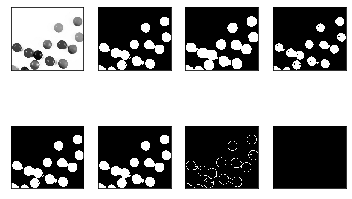

In [62]:
img = cv.imread('smarties.png', 0) #image in grayscale
mask = cv.threshold(img, 220, 255, cv.THRESH_BINARY_INV)[1] #binarized image (mask)

kernel = np.ones((3, 3), np.uint8) #to be use in morphological transformations (e.g: as a 3x3 block of pixel) 

dilation = cv.dilate(mask, kernel, iterations=2) #will increase the shapes, runs the kernel over the mask & if any pixel in kernel has 1 (or 255) then the current pixel value will be set as 1 (or 255) 
erosion = cv.erode(mask, kernel, iterations=2) #will decrease the shapes, runs the kernel over the mask & if any pixel in kernel has 0 then the current pixel value will be set as 0
opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=1) #performs erosion first then dilation (cv.dilate())
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=2) #performs dilation first then erosion (cv.erode())
morphological_gradient = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel) #difference b/w dilation & erosion (dilation - erosion) 
top_hat = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernel) #difference b/w mask & opening (mask - opening) 

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'morphological_gradient', 'top_hat'] #to be use in 'for' loop
images = [img, mask, dilation, erosion, opening, closing, morphological_gradient, top_hat] #to be use in 'for' loop
for i in range(8):
    cv.imshow(titles[i], images[i])
    
cv.waitKey(0)
cv.destroyAllWindows()

#displaying with pyplot (small & messy view)
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], 'gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()
